# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
riskFactors<-read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")

riskFactors <- riskFactors[rep(row.names(riskFactors), riskFactors$count), 1:12]
nrow(riskFactors)

[1] 6318638

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [2]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
riskFactors<-riskFactors[sample(nrow(riskFactors), 5000), ]
nrow(riskFactors)

[1] 5000

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [3]:
head(riskFactors)
riskFactors[, 3:12][riskFactors[, 3:12] == 9] <- NA
head(riskFactors)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
792997.89,2006,8,9,9,9,9,2,9,2,9,0,0
986739.194,2008,7,2,0,9,9,2,0,2,9,0,0
845393.799,2007,5,1,0,9,9,2,0,1,9,0,0
996805.11,2008,8,1,1,1,1,2,0,2,2,0,0
481428.71,2004,3,1,0,9,9,3,0,1,2,0,0
169906.1,2001,6,5,0,9,9,1,1,2,3,0,0


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history
792997.89,2006,8,NA,NA,NA,NA,2,NA,2,NA,0,0
986739.194,2008,7,2,0,NA,NA,2,0,2,NA,0,0
845393.799,2007,5,1,0,NA,NA,2,0,1,NA,0,0
996805.11,2008,8,1,1,1,1,2,0,2,2,0,0
481428.71,2004,3,1,0,NA,NA,3,0,1,2,0,0
169906.1,2001,6,5,0,NA,NA,1,1,2,3,0,0


#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [4]:
riskFactors$age<-rep(NA,nrow(riskFactors))

for (i in 1:nrow(riskFactors)){
    if (riskFactors$age_group_5_years[i] == 1){
        riskFactors$age[i]<- mean(18:29)
        }
    else if (riskFactors$age_group_5_years[i] == 2){
        riskFactors$age[i]<- mean(30:34)
        }
    else if (riskFactors$age_group_5_years[i] == 3){
        riskFactors$age[i]<- mean(35:39)
        }
    else if (riskFactors$age_group_5_years[i] == 4){
        riskFactors$age[i]<- mean(40:44)
        }
    else if (riskFactors$age_group_5_years[i] == 5){
        riskFactors$age[i]<- mean(45:49)
        }
    else if (riskFactors$age_group_5_years[i] == 6){
        riskFactors$age[i]<- mean(50:54)
        }
    else if (riskFactors$age_group_5_years[i] == 7){
        riskFactors$age[i]<- mean(55:59)
        }
    else if (riskFactors$age_group_5_years[i] == 8){
        riskFactors$age[i]<- mean(60:64)
        }
    else if (riskFactors$age_group_5_years[i] == 9){
        riskFactors$age[i]<- mean(65:69)
        }
    else if (riskFactors$age_group_5_years[i] == 10){
        riskFactors$age[i]<- mean(70:74)
        }
    else if (riskFactors$age_group_5_years[i] == 11){
        riskFactors$age[i]<- mean(75:79)
        }
    else if (riskFactors$age_group_5_years[i] == 12){
        riskFactors$age[i]<- mean(80:84)
        }
    else if (riskFactors$age_group_5_years[i] == 13){
        riskFactors$age[i]<- mean(85:92)
        }
    }

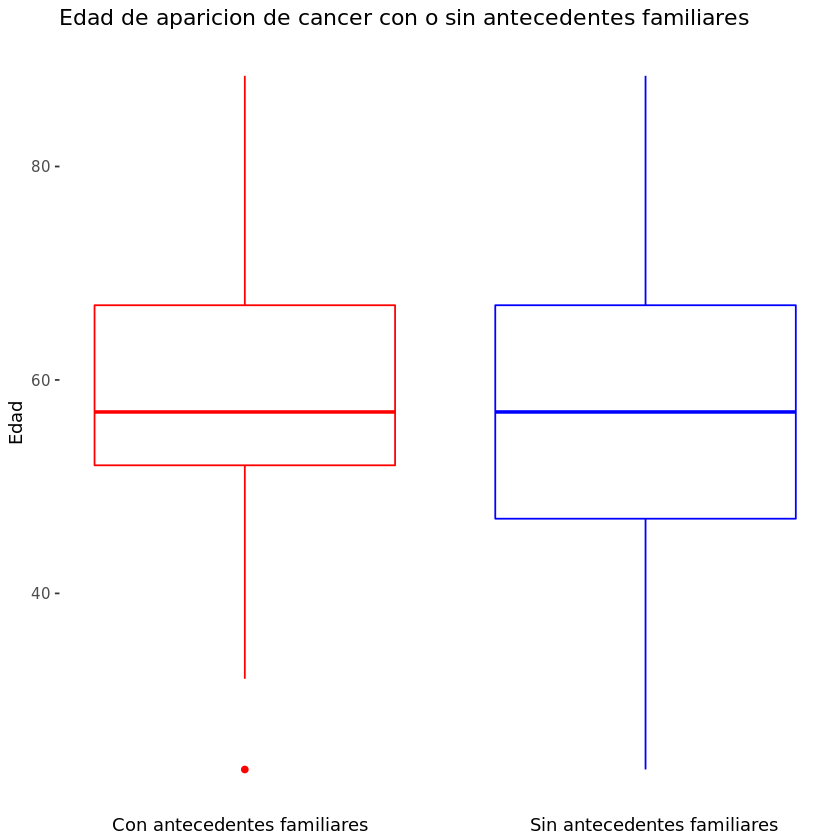

In [5]:
riskFamily<-subset(riskFactors, first_degree_hx== 1)
riskNotFamily<-subset(riskFactors, first_degree_hx== 0)

library(ggplot2)

ggplot(data=riskFamily,aes(x=0,y=age))+geom_boxplot(color="red")+
    geom_boxplot(data=riskNotFamily,aes(x=1,y=age),color="blue")+
       xlab("Con antecedentes familiares                           Sin antecedentes familiares")+
       ylab("Edad")+ggtitle("Edad de aparicion de cancer con o sin antecedentes familiares")+
        theme(panel.background = element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [6]:
#En primer lugar utilizamos el test de Shapiro para comprobar si las distribuciones se asemejan a una gaussiana.

shapiro.test(riskFamily$age)
shapiro.test(riskNotFamily$age)


	Shapiro-Wilk normality test

data:  riskFamily$age
W = 0.97035, p-value = 4.526e-11



	Shapiro-Wilk normality test

data:  riskNotFamily$age
W = 0.96009, p-value < 2.2e-16


Los p-valores son muy bajos con lo que se descarta la modelización de estas distribuciones con una gaussiana. Tiene sentido ya que la probabilidad de aparición de cancer se concentra por lo general en edades altas.

Probaremos por lo tanto con el test de Wilcoxon-Mann-Whitney.

In [7]:
wilcox.test(age ~ first_degree_hx, data=riskFactors) 


	Wilcoxon rank sum test with continuity correction

data:  age by first_degree_hx
W = 1239200, p-value = 2.339e-06
alternative hypothesis: true location shift is not equal to 0


De acuerdo con este test podemos asumir que la edad de aparición de cancer es dependiente de los antecedentes familiares porque el valor del p-valor es muy bajo y por lo tanto hay que rechazar la hipótesis nula (que ambas distribuciones son iguales).

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

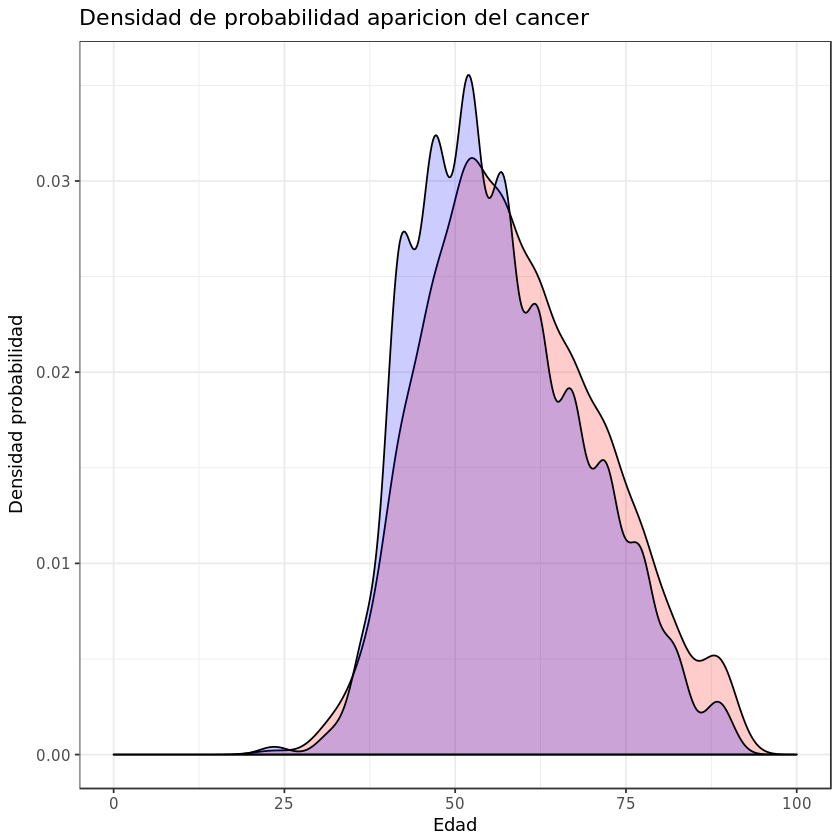

In [8]:
ggplot(data=riskFamily, aes(x=age)) + 
    geom_density(fill="red", alpha=0.2, color="black")+
    geom_density(data=riskNotFamily, aes(x=age),fill="blue", alpha=0.2,color="black")+
    xlab("Edad")+
    ylab("Densidad probabilidad")+ggtitle("Densidad de probabilidad aparicion del cancer")+
    scale_x_continuous( lim = c(0, 100))+
    theme_bw()

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

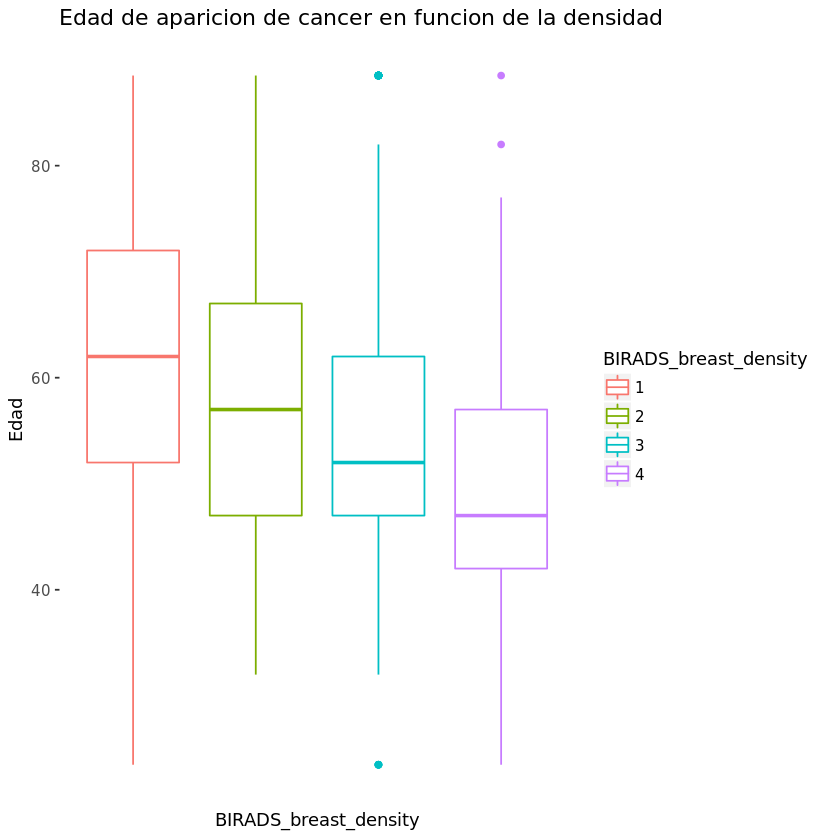

In [9]:
riskFactors$BIRADS_breast_density<-as.factor(riskFactors$BIRADS_breast_density)
library(ggplot2)

ggplot(data=riskFactors[complete.cases(riskFactors[ ,7]),],aes(x=BIRADS_breast_density,y=age,color=BIRADS_breast_density))+geom_boxplot()+
       ylab("Edad")+ggtitle("Edad de aparicion de cancer en funcion de la densidad")+
        theme(panel.background = element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [10]:
#De nuevo, utilizamos el test de Shapiro para comprobar si las distribuciones se asemejan a una gaussiana.

risk1<-subset(riskFactors,BIRADS_breast_density==1)
risk2<-subset(riskFactors,BIRADS_breast_density==2)
risk3<-subset(riskFactors,BIRADS_breast_density==3)
risk4<-subset(riskFactors,BIRADS_breast_density==4)

shapiro.test(risk1$age)
shapiro.test(risk2$age)
shapiro.test(risk3$age)
shapiro.test(risk4$age)


	Shapiro-Wilk normality test

data:  risk1$age
W = 0.97827, p-value = 0.0001754



	Shapiro-Wilk normality test

data:  risk2$age
W = 0.96396, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  risk3$age
W = 0.95489, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  risk4$age
W = 0.93365, p-value = 2.56e-09


Como ya sabíamos, la edad de aparición de cancer no cumple una distribución normal (y menos cuanto más fraccionamos los datos).

En este caso probaremos un test para comparar la media de varias variables que no siguen una gaussiana (Kruskal-Wallis).

In [11]:
riskKruskal <- rbind(data.frame(value=risk1$age,cl="1"),data.frame(value=risk2$age,cl="2"),data.frame(value=risk3$age,cl="3"),data.frame(value=risk4$age,cl="4"))

kruskal.test( value ~ cl, data=riskKruskal)


	Kruskal-Wallis rank sum test

data:  value by cl
Kruskal-Wallis chi-squared = 156.19, df = 3, p-value < 2.2e-16


El p-valor es realmente bajo, por lo que podemos rechazar la hipótesis nula. Esto significa que no todos los grupos tienen la misma media y por lo tanto la edad de aparición del cáncer varía en función de la densidad.

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [12]:
#Lo comprombamos con un test de Chi cuadrado de una variable.
#Para ello contamos casos de cancer en la muestra de cada tipo.

observed<-c(nrow(risk1),nrow(risk2),nrow(risk3),nrow(risk4))

cqt<-chisq.test(observed)
cqt


	Chi-squared test for given probabilities

data:  observed
X-squared = 1816.3, df = 3, p-value < 2.2e-16


Un p-valor tan bajo nos hace rechazar la hipótesis nula (que todos los tipos de cancer tienen la misma probabilidad).

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

[1] "El tipo mas comun es el  2"

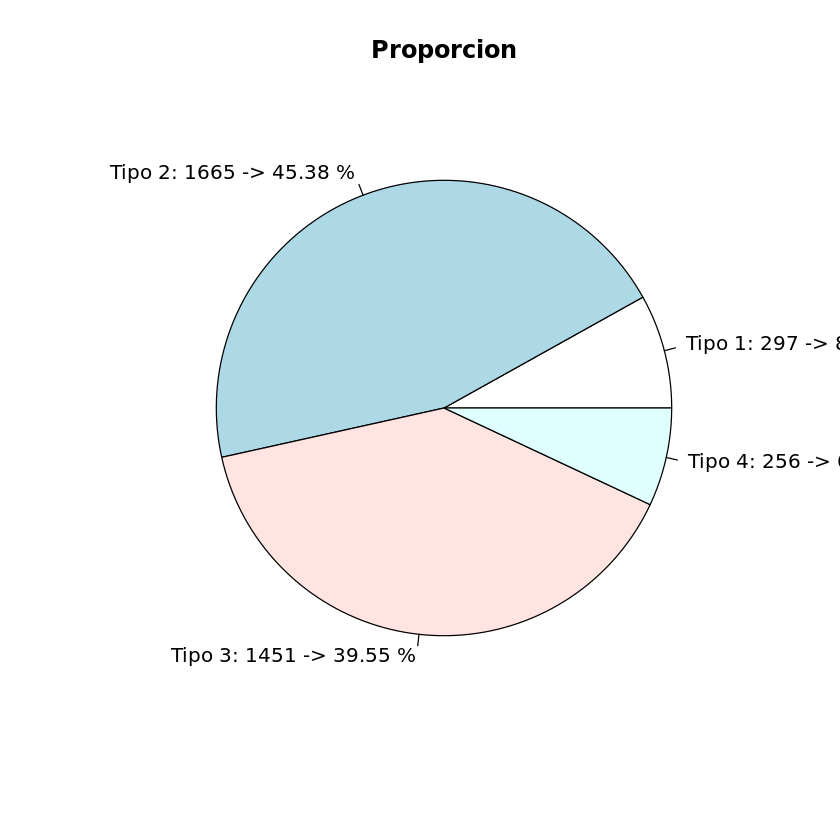

In [13]:
paste("El tipo mas comun es el ", which.max(observed))

slices <- observed
lbls <- c(paste("Tipo 1:",observed[1],"->",round(observed[1]/sum(observed)*100,2),"%"),
          paste("Tipo 2:",observed[2],"->",round(observed[2]/sum(observed)*100,2),"%"),
          paste("Tipo 3:",observed[3],"->",round(observed[3]/sum(observed)*100,2),"%"),
          paste("Tipo 4:",observed[4],"->",round(observed[4]/sum(observed)*100,2),"%"))     
    
pie(slices, labels = lbls, main="Proporcion")

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [14]:
chi1 <- table(riskFactors$first_degree_hx,riskFactors$BIRADS_breast_density)
chisq.test(chi1)


	Pearson's Chi-squared test

data:  chi1
X-squared = 4.2475, df = 3, p-value = 0.236


In [15]:
paste("El p-valor es lo suficientemente alto para asumir que ambas variables dependen la una de la otra.")

[1] "El p-valor es lo suficientemente alto para asumir que ambas variables dependen la una de la otra."

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [16]:
chi2 <- table(riskFactors$race_eth,riskFactors$BIRADS_breast_density)

chisq.test(chi2,simulate.p.value = T)


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  chi2
X-squared = 48.684, df = NA, p-value = 0.0004998


In [17]:
paste("El valor es muy bajo para asumir que ambas variables dependen la una de la otra.")

[1] "El valor es muy bajo para asumir que ambas variables dependen la una de la otra."

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [18]:
rsikFnotNA<-riskFactors[complete.cases(riskFactors[ ,7]),]
rsikFnotNA<-rsikFnotNA[complete.cases(rsikFnotNA[ ,3]),]

C1N4<-nrow(subset(risk1,race_eth==4))
C1Notros<-nrow(risk1)-C1N4
CotrosN4<-nrow(subset(riskFactors,race_eth==4))-C1N4
CotrosNotros<-nrow(rsikFnotNA)-nrow(risk1)-nrow(subset(riskFactors,race_eth==4))+C1N4

In [19]:
tbl<-as.table(matrix(c(C1N4,
                       CotrosN4,
                       C1Notros,
                       CotrosNotros),
        dimnames = list(c("Cancer tipo 1","Otros tipos"),c("Native American","Otra etnia")),nrow=2))
tbl

              Native American Otra etnia
Cancer tipo 1               1        296
Otros tipos                25       2977

In [20]:
prop.table(tbl,margin = 2)

              Native American Otra etnia
Cancer tipo 1      0.03846154 0.09043691
Otros tipos        0.96153846 0.90956309

In [21]:
paste("La probabilidad de que un Native American tenga un cancer tipo 1 es del",round(prop.table(tbl,margin = 2)[1,1]*100,2),"%")

[1] "La probabilidad de que un Native American tenga un cancer tipo 1 es del 3.85 %"

In [22]:
#Veamos ahora el intervalo de confianza del 95%
n<-C1N4+CotrosN4+C1Notros+CotrosNotros
ns<-C1N4
p_<-round(prop.table(tbl,margin = 2)[1,1],4)

print(paste("Probabilidad:",p_," Exitos:",ns," Eventos totales:",n))

[1] "Probabilidad: 0.0385  Exitos: 1  Eventos totales: 3299"


In [23]:
pval<-0.05
E<-qnorm(pval/2,lower.tail = F)*sqrt(p_*(1-p_)/n)+1/(2*n)
print(paste0("Intervalo de confianza del 95%: [",round((p_-E)*100,2),"%,",round((p_+E)*100,2),"%]"))

[1] "Intervalo de confianza del 95%: [3.18%,4.52%]"
